In [2]:
import tweepy
import simplejson as json
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
from textblob import TextBlob
import pandas as pd
import re

In [3]:
# Credentials
consumer_key = 'XXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_secret = 'XXX'

# Authentication
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [4]:
class MyListener(StreamListener):
    
    def __init__(self, api=None):
        super(StreamListener, self).__init__()
        self.num_tweets = 0

    def on_data(self, data):
        try:
            with open('Australia.json', 'a') as f:
                f.write(data) # This will store the whole JSON data in the file, you can perform some JSON filters
                twitter_text = json.loads(data)['text'] # You can also print your tweets here
                self.num_tweets += 1
                
                # Just to limit the number of tweets collected to check the 
                # program at the beginning, then increase the limit
                if self.num_tweets < 20: 
                    return True
                else:
                    return False
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True

 
    def on_error(self, status):
        print('Error :', status.place)
        return False
    
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(
    locations = [113.338953078, -43.6345972634, 153.569469029, -10.6681857235],
    track=["flushots","flu shots","flu shot","flushot","flu vaccine","#flushots","fluvaccine","#flushot"],
    languages=["en"]
) # Add your keywords and other filters

print('_______ End _______')



_______ End _______


In [5]:
 # Create the CSV file
with open ("South America/AAA.csv", 'w', encoding="utf-8") as csv:
    # Write the title of the columns (features) that you want to store in the CSV file
        csv.write("selected_name," + "created_at," + "text," + 
                  "country," + 
                  "location," + 
                  "followers," +
                  "friends," + "listed_count," + "favourites_count," + "verified," + 
                  "statuses_count," + "contributors_enabled," + "profile_image_url," +"\n")

In [6]:

        
# Create the CSV file
with open ("South America/Venezuela.csv", 'w', encoding="utf-8") as csv:
     
        # Copy the data from the JSON file
        with open('South America/Venezuela.json', 'r') as jsonfile:
            for tweet in jsonfile:
                try:
                    data = json.loads(tweet)
                except:
                    continue
                # The int values should be converted to strings
                
                #csv.write(str(data["id"]) + ",")
                csv.write(str(data["user"]["name"]) + ",")
                csv.write(str(data["created_at"]) + ",")
                csv.write((str(data["text"]).replace("\n","").replace(",","")) + ",")
                if(data["place"] is None):
                    csv.write("Venezuela" + ",")
                else:
                    csv.write(str(data["place"]["country"]) + ",")
                
                if(data["place"] is None):
                    csv.write("General" + ",")
                else:
                    csv.write(str(data["place"]["name"]) + ",")
                    
                csv.write(str(data["user"]["followers_count"]) + ",")
                csv.write(str(data["user"]["friends_count"]) + ",")
                csv.write(str(data["user"]["listed_count"]) + ",")
                csv.write(str(data["user"]["favourites_count"]) + ",")
                csv.write(str(data["user"]["verified"]) + ",")
                csv.write(str(data["user"]["statuses_count"]) + ",")
                csv.write(str(data["user"]["contributors_enabled"]) + ",")
                csv.write(str(data["user"]["profile_image_url"]) + ",")
                #csv.write(str(data["user"][""]) + ",")
                #csv.write(str(data["user"][""]) + ",")
                #csv.write(str(data["user"][""]) + ",")
                #csv.write(str(data["user"][""]) + ",")
                
                # Write New User Data
                csv.write("\n")

In [7]:
# Display max columns text and not shorten
pd.set_option('display.max_colwidth', -1)

# Assign dataset into pandas 
tweets = pd.read_csv('North America/North_America.csv', index_col=0, encoding='ISO-8859-1', skiprows=0)

# Some column that snipped to our DF
del tweets['Unnamed: 13']

# Show first n columns from dataset 
tweets.head(100)

,created_at,text,country,location,followers,friends,listed_count,favourites_count,verified,statuses_count,contributors_enabled,profile_image_url
selected_name,,,,,,,,,,,,
Khandaghabadi,Fri Jan 17 19:55:44 +0000 2020,This was revealing and scary but Im incredibly happy with it. Thank you @jbienkahn and @jachristian for spending thâ¦ https://t.co/I66wX8QkaB,United States,California,3113,862,46,26310,True,18472,False,http://pbs.twimg.com/profile_images/1211060469907066880/oIYPPx28_normal.jpg
Ted Kim,Fri Jan 17 19:55:44 +0000 2020,ââFrom the first the nation was already set on its course toward consumer cultureâs counterfeit beatific vision iâ¦ https://t.co/hVe6lq4NRz,United States,Chicago,1280,264,22,1833,False,3465,False,http://pbs.twimg.com/profile_images/1199770407890571265/7ZWtFwxE_normal.jpg
ð»ððð»ðð,Fri Jan 17 19:55:44 +0000 2020,eating ass @,United States,Buffalo Wild Wings,34,167,0,1866,False,380,False,http://pbs.twimg.com/profile_images/1216388264959074306/DeVEkQ0K_normal.jpg
Hollowtiptahjð¹,Fri Jan 17 19:55:44 +0000 2020,@xgabyv strong ass cheek bones,United States,Lakeland Heights,2136,1400,34,11862,False,17924,False,http://pbs.twimg.com/profile_images/1217238898591653889/9lLJwYoB_normal.jpg
AshleyRNDM @ wherever the F I want.,Fri Jan 17 19:55:44 +0000 2020,Shoot me. A decade later my gf is still on the Team Edward vs. Team Jacob debate.,United States,Mesa,58,269,5,9283,False,6160,False,http://pbs.twimg.com/profile_images/750594596854521859/CudXSMM0_normal.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
David Berger ð³ï¸âð,Fri Jan 17 19:43:07 +0000 2020,Hugs ð¤ and smooches ð - hope your day is going well! https://t.co/qtJnkhaow2,United States,Florida,3489,4362,109,42737,False,18658,False,http://pbs.twimg.com/profile_images/1211749817073971206/ARCLBL3u_normal.jpg
ayymijackicitað²ð½,Fri Jan 17 19:43:07 +0000 2020,NOBODY ABSOLUTELY NOBODY:My man:,United States,Ennis,591,594,0,12967,False,2004,False,http://pbs.twimg.com/profile_images/1178524796537262080/JHOd0hDc_normal.jpg
jessica,Fri Jan 17 19:43:07 +0000 2020,My doctor appointment went well. All my numbers like cholesterol&amp;shit is good except my iron and vitamin D are realâ¦ https://t.co/xk84Q3gcDC,Mexico,General,94,186,4,5807,False,9039,False,http://pbs.twimg.com/profile_images/1194346920472387585/wmdIhSFr_normal.jpg


In [52]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analysis(tweets):
    analyzer = SentimentIntensityAnalyzer()
    polarity_blob=0
    subjectivity_blob=0

    count = 0
    for texti in tweets.text:
        analysis = TextBlob(texti)
        polarity_blob += analysis.sentiment[0]
        subjectivity_blob += analysis.sentiment[1]
        count+=1
    print("average polarity with TextBlob = ", polarity_blob / count )
    print("average subjectivity with TextBlob = ", subjectivity_blob / count )
#----------------------------------------------------------------------------------------------------------------------    
    compound_vader=0

    count1 = 0
    for texti in tweets.text:
        vs = analyzer.polarity_scores(texti)
        compound_vader += vs['compound']
        count1+=1
    print("average compound with Vader = ", compound_vader / count1)
      
    pol=polarity_blob/count
    sub = subjectivity_blob/count
    com = compound_vader/count1
    return pol,sub,com



In [53]:
tweets = pd.read_csv('North America/North_America.csv', index_col=0, encoding='ISO-8859-1')
North_America_pol, North_America_sub, North_America_com = analysis(tweets)

tweets = pd.read_csv('South America/South_America.csv', index_col=0, encoding='ISO-8859-1')
South_America_pol, South_America_sub, South_America_com = analysis(tweets)

tweets = pd.read_csv('Africa/Africa.csv', index_col=0, encoding='ISO-8859-1')
Africa_pol, Africa_sub, Africa_com = analysis(tweets)

tweets = pd.read_csv('Australia/Australia_Continent.csv', index_col=0, encoding='ISO-8859-1')
Australia_pol, Australia_sub, Australia_com = analysis(tweets)

tweets = pd.read_csv('Asia/Asia.csv', index_col=0, encoding='ISO-8859-1')
Asia_pol, Asia_sub, Asia_com = analysis(tweets)

tweets = pd.read_csv('Europe/Europe.csv', index_col=0, encoding='ISO-8859-1')
Europe_pol, Europe_sub, Europe_com = analysis(tweets)

average polarity with TextBlob =  0.16244747899159662
average subjectivity with TextBlob =  0.3057072829131653
average compound with Vader =  0.2053333333333334
average polarity with TextBlob =  0.09389336527293844
average subjectivity with TextBlob =  0.5718786295005804
average compound with Vader =  0.1377487804878049
average polarity with TextBlob =  0.12688212481962483
average subjectivity with TextBlob =  0.485016305916306
average compound with Vader =  0.11665800000000003
average polarity with TextBlob =  0.11411943885535436
average subjectivity with TextBlob =  0.5089341605186676
average compound with Vader =  -0.027799999999999936
average polarity with TextBlob =  0.14923214285714287
average subjectivity with TextBlob =  0.528732142857143
average compound with Vader =  0.16185600000000006
average polarity with TextBlob =  0.19732142857142868
average subjectivity with TextBlob =  0.574642857142857
average compound with Vader =  0.22464142857142866


In [54]:
import numpy as np
df = pd.DataFrame(np.array([[North_America_pol, North_America_sub, North_America_com], 
                            [South_America_pol, South_America_sub, South_America_com],
                            [Africa_pol, Africa_sub, Africa_com],
                            [Australia_pol, Australia_sub, Australia_com],
                            [Asia_pol, Asia_sub, Asia_com],
                            [Europe_pol, Europe_sub, Europe_com]]),
                    columns=['Polarity', 'Subjectivity', 'Compound'])
df.index= ['North America', 'South America','Africa','Australia','Asia','Europe']
#df["Subjective Polarity"] = df[''] 

df['Subjective Pol']= df['Polarity']*(1 - (df['Polarity'] * (0.5 - df['Subjectivity']) * 2))

In [88]:
df['Continent'] = df.index.values
df['Proportional'] = (df['Polarity'] - df['Subjective Pol'])/df['Polarity']*100
df['pie_proportional'] = df['Subjective Pol'] / sum(df['Subjective Pol'])
df

,Polarity,Subjectivity,Compound,Subjective Pol,Continent,Proportional,pie_proportional
North America,0.162447,0.305707,0.205333,0.152193,North America,6.312472,0.180805
South America,0.093893,0.571879,0.137749,0.095161,South America,-1.349785,0.113051
Africa,0.126882,0.485016,0.116658,0.126400,Africa,0.380233,0.150163
Australia,0.114119,0.508934,-0.027800,0.114352,Australia,-0.203912,0.135850
Asia,0.149232,0.528732,0.161856,0.150512,Asia,-0.857552,0.178808
Europe,0.197321,0.574643,0.224641,0.203134,Europe,-2.945727,0.241323


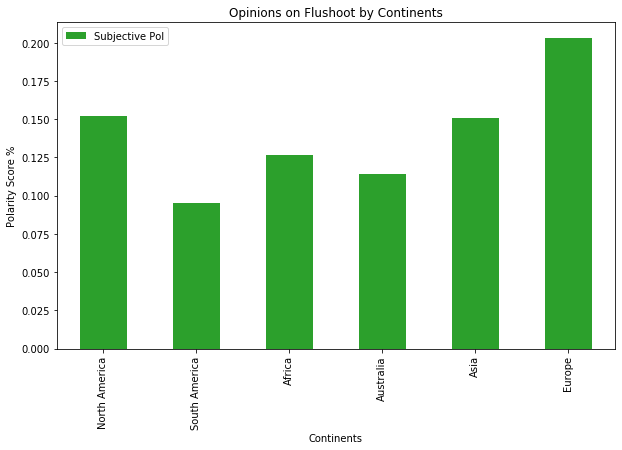

C:\Users\hmtkv\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


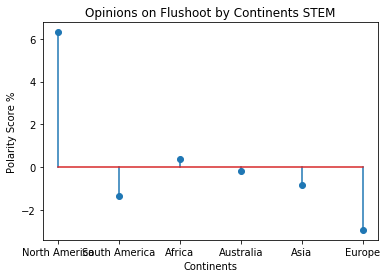

In [126]:
import matplotlib.pyplot as plt
#df.plot(kind='bar', x= 'Continent', y=['Polarity', 'Subjective Pol'], figsize=(10, 6))
df.plot(kind='bar', x= 'Continent', y='Subjective Pol', figsize=(10, 6), color="C2")
#df.plot(kind='stem', x= 'Continent', y='Proportional', figsize=(10, 6), color="C3")

plt.title('Opinions on Flushoot by Continents')
plt.ylabel('Polarity Score %')
plt.xlabel('Continents')
plt.savefig('histogram.png')
plt.show()

plt.title('Opinions on Flushoot by Continents STEM')
plt.ylabel('Polarity Score %')
plt.xlabel('Continents')

plt.stem(df['Continent'], df['Proportional'])
plt.savefig('stem.png')

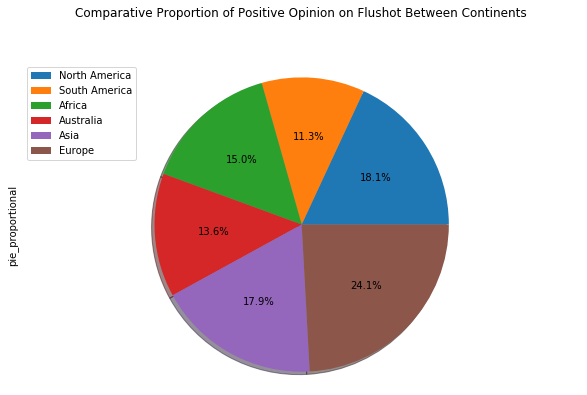

In [125]:
df.plot(kind='pie', y='pie_proportional', figsize=(10, 6), autopct='%1.1f%%', shadow=True, labels=None)

plt.title('Comparative Proportion of Positive Opinion on Flushot Between Continents', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df.index, loc='upper left') 
plt.savefig('Pie_chart.png')